In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import powerlaw
from scipy.stats import linregress
import numpy as np
import seaborn as sns
import scipy
import datetime
import re
import scipy.stats as stats
import spacy
# from textblob import TextBlob
import random
#from googletrans import Translator, LANGUAGES

In [91]:
#Lets open the CSV files and convert them into df
df_beers = pd.read_csv(r'C:\Users\jjfrybes\Downloads\RateBeer\beers.csv')
df_breweries = pd.read_csv(r'C:\Users\jjfrybes\Downloads\RateBeer\breweries.csv')
df_users = pd.read_csv(r'C:\Users\jjfrybes\Downloads\RateBeer\users.csv')

## RateBeer first quick analysis
Here we first open the CSV files of the RateBeer database. It is composed of df_beers, df_breweries, df_users. To understand what these dataframe contain, we print the column values, and try to describe the numeric variables. We'll start by df_beers

In [92]:
# Printing some basic information about df_beers
beers_columns = df_beers.columns.values
print('The columns included in df_beers are ',beers_columns)
print('The shape of df_beers is', df_beers.shape)
print('So that',df_beers.beer_id.nunique(), 'unique beers are registered. Meaning that the number of missing beer_id values is',df_beers.beer_id.isnull().sum())
print('These beers come from',df_beers.brewery_id.nunique(), 'different breweries.')

The columns included in df_beers are  ['beer_id' 'beer_name' 'brewery_id' 'brewery_name' 'style' 'nbr_ratings'
 'overall_score' 'style_score' 'avg' 'abv' 'avg_computed' 'zscore'
 'nbr_matched_valid_ratings' 'avg_matched_valid_ratings']
The shape of df_beers is (442081, 14)
So that 442081 unique beers are registered. Meaning that the number of missing beer_id values is 0
These beers come from 23199 different breweries.


The columns included in df_breweries are  ['id' 'location' 'name' 'nbr_beers']


count    24189.000000
mean        19.022655
std         31.542620
min          0.000000
25%          3.000000
50%          8.000000
75%         20.000000
max        295.000000
Name: nbr_beers, dtype: float64

There are 267 location represented.


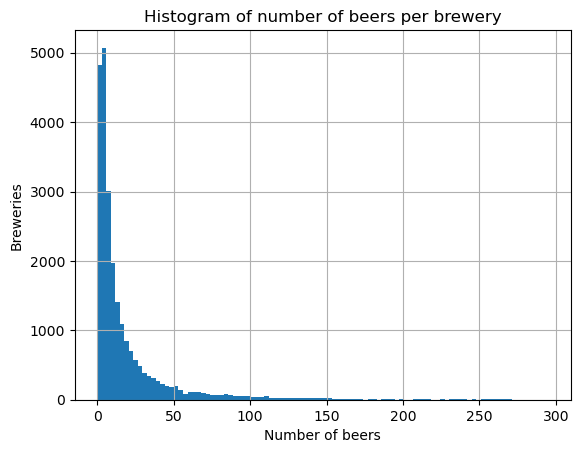

In [93]:
# Printing some basic information about df_breweries
breweries_columns = df_breweries.columns.values
print('The columns included in df_breweries are ',breweries_columns)
display(df_breweries.nbr_beers.describe())
df_breweries.nbr_beers.hist(bins=100)
plt.title('Histogram of number of beers per brewery')
plt.xlabel('Number of beers')
plt.ylabel('Breweries')
print('There are',df_breweries.location.nunique(), 'location represented.')

We see that df_breweries only has 3 columns.

There are 24189 breweries listed, in average every brewery has 19 beers reviewed on the RateBeer website. This mean is way above the median, at 8 per brewery.

These breweries come from 267 locations, this location can be countries or states (mainly in the U.S)

As only three columns are present in df_breweries, and 'id' is in common with df_beers, we merge the two datasets. However before merging them, we change the column name


In [94]:
# Merging df_breweries and df_beers
df_breweries_renamed=df_breweries.rename(columns={'id':'brewery_id'})
df_beers_enlarged = pd.merge(df_beers, df_breweries_renamed, how='left', on=['brewery_id'])
display(df_beers_enlarged)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,name,nbr_beers
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN,Gabon,Sobraga,3
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN,Gabon,Sobraga,3
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN,Gabon,Sobraga,3
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667,Northern Ireland,Ards Brewing Co.,13
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN,Northern Ireland,Ards Brewing Co.,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442076,189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN,Albania,Stefani & Co,11
442077,84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN,Albania,Hotel Martini,1
442078,93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN,Albania,Rozafa Brewery,1
442079,220897,Svejk Blonde,17155,Svejk Beer Garden,Pale Lager,4,NaN,NaN,2.70,NaN,2.500000,NaN,0,NaN,Albania,Svejk Beer Garden,2


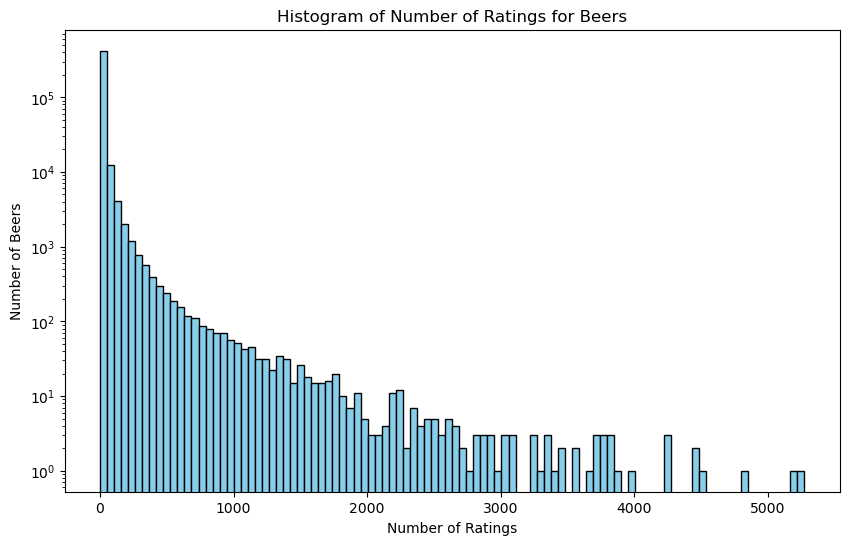

In [95]:
# Plot the distribution of the number of ratings per beer
plt.figure(figsize=(10,6))
xmin = np.min(df_beers_enlarged['nbr_ratings'])
xmax = np.max((df_beers_enlarged['nbr_ratings']))
plt.hist(df_beers_enlarged['nbr_ratings'],bins=100, color='skyblue',edgecolor='black', log=True)
# Adding labels and title
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Beers')
plt.title('Histogram of Number of Ratings for Beers')

# Show the plot
plt.show()

We can see that there are lots of beers with very few ratings. To check whether we should keep those beers we should perform a correlation study between the number of ratings and the average rating. If such a correlation exists, we want to make sure to remove the beers with few ratings as this would clearly bias our findings. Even in case such a correlation doesn't exist, we should still define some threshold for the number of reviews, below which  

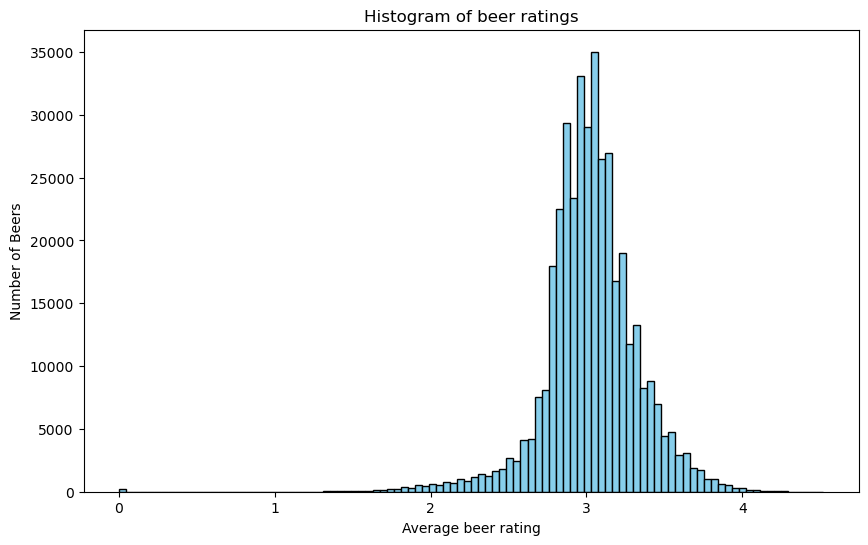

In [96]:
# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_beers_enlarged['avg'], bins=100, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Average beer rating')
plt.ylabel('Number of Beers')
plt.title('Histogram of beer ratings')

# Show the plot
plt.show()

### users.csv file
The third csv file of the RateBeer dataset contains some data about the users registered on the website. Lets look at it !

In [97]:
# df_users quick description
display(df_users)
df_users.isnull().sum()


,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


nbr_ratings        0
user_id            0
user_name          0
joined            30
location       19582
dtype: int64

From the df_users we can extract the location of origin, the name and the number of ratings, as well as the joining time.

A lot of locations are missing (19582~27%), maybe the location is specified by the user and not linked to an IP adress such that more than a quarter of the registered users didn't want to give their location.

In [98]:
# How are the users ratings distributed
df_users.nbr_ratings.describe()

count    70174.000000
mean       108.820945
std        754.493211
min          1.000000
25%          1.000000
50%          2.000000
75%         10.000000
max      46749.000000
Name: nbr_ratings, dtype: float64

In [99]:
df_users.loc[df_users['nbr_ratings'] == 46749]

,nbr_ratings,user_id,user_name,joined,location
16,46749,38926,fonefan,1.150970e+09,Denmark


The number of ratings per user is widely dispersed as the median of ratings is of 2 per users, but the mean is at 108 ratings per user. And the user with the higest number of ratings attains 46749 ratings, which would mean the testing and rating of one beer per day during 128 years, or of 7.53 beers per day during the 17 years of the website lifetime, this is a lot !!!!

It is clearly an outlier, that shouldn't be included in the histogram. To do so we search the quantile of 95% of the values.

The 95 percentile is 335.0


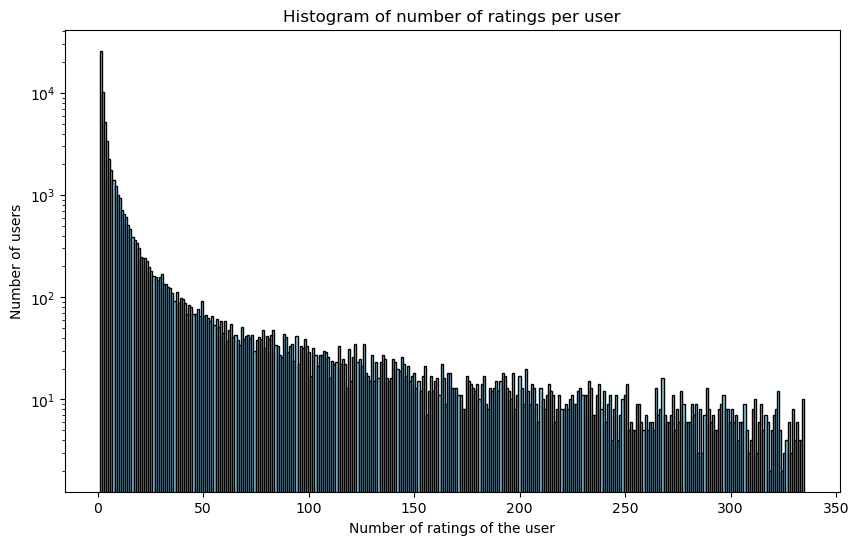

In [101]:
# Delete the outliers
users_95_quant = np.percentile(df_users.nbr_ratings, 95)
print('The 95 percentile is',users_95_quant)
df_users_hist=df_users.loc[df_users['nbr_ratings']<=users_95_quant]
# Histogram of the number of ratings per user

plt.figure(figsize=(10, 6))
plt.hist(df_users_hist.nbr_ratings, bins=users_95_quant.astype(np.int64), color='skyblue', edgecolor='black',log=True)
#plt.xscale('log')

# Adding labels and title
plt.title('Histogram of number of ratings per user')
plt.xlabel('Number of ratings of the user')
plt.ylabel('Number of users')


# Show the plot
plt.show()


Another important information of df_users id the joined column. It represents the date where the user joined the website. The date is represented as a (very large) float value, which is a *Unix time* (https://en.wikipedia.org/wiki/Unix_time), the time in seconds since January 1st 1970.

This is a useful date format for analysis and computation, but not very understandable.
Such that we transform it into regular georgian calendar date.

Later on, in this notebook we will plot a histogram of the joining date of the users.


In [102]:
# New df_users with date
df_users_date=df_users.copy()
df_users_date['joined_date'] = pd.to_datetime(df_users_date['joined'], unit='s')
display(df_users_date.sort_values(by=['joined_date'], ascending=True))

,nbr_ratings,user_id,user_name,joined,location,joined_date
8504,219,3,billb,955533600.0,"United States, Georgia",2000-04-12 10:00:00
24853,5,10,Mark99,955533600.0,"United States, Georgia",2000-04-12 10:00:00
12193,42,7,young,955533600.0,"United States, Georgia",2000-04-12 10:00:00
57269,1,15,lazarus99,955533600.0,"United States, Georgia",2000-04-12 10:00:00
11184,52,2,wade,955533600.0,"United States, Georgia",2000-04-12 10:00:00
...,...,...,...,...,...,...
53873,1,287774,User287774,NaN,NaN,NaT
56719,1,218136,User218136,NaN,NaN,NaT
61389,1,101024,User101024,NaN,NaN,NaT
67562,1,135544,Guest15125,NaN,NaN,NaT


In [103]:
print('The share of missing values for the joined date is ', np.round((df_users_date.joined_date.isnull().sum())/(len(df_users_date))*100, 2),'%')

The share of missing values for the joined date is  0.04 %


The missing values for the joining dates are pretty rare.

Finally lets ldisplay(df_users.location.value_counts())ook at the location data about the users.


In [104]:
display(df_users.location.value_counts())

location
Canada                         3255
United States, California      2804
England                        2734
Poland                         1701
United States, Pennsylvania    1632
                               ... 
Liechtenstein                     1
Lesotho                           1
East Timor                        1
Falkland Islands                  1
Tibet                             1
Name: count, Length: 222, dtype: int64

It seems that the location can either be a country either a US state, we want to separate this into countries and states. Later on we could also agregate this as region/continents.


### Ratings.txt

Let's open the ratings.txt file and see what's in it


In [88]:
f =  open(r'C:\Users\jjfrybes\Downloads\RateBeer\ratings.txt\ratings.txt', encoding='utf-8')

# Read the beginning of the file to see its shape
print(f.read(1500))

beer_name: 33 Export (Gabon)
beer_id: 410549
brewery_name: Sobraga
brewery_id: 3198
style: Pale Lager
abv: 5.0
date: 1461664800
user_name: Manslow
user_id: 175852
appearance: 2
aroma: 4
palate: 2
taste: 4
overall: 8
rating: 2.00
text: Puszka 0,33l dzięki Christoph . Kolor jasnozłoty, piana biała drobnoziarnista szybko opada. Aromat słodowy, lekko słodkie.Dość dobre. 

beer_name: Castel Beer (Gabon)
beer_id: 105273
brewery_name: Sobraga
brewery_id: 3198
style: Pale Lager
abv: 5.2
date: 1487329200
user_name: MAGICuenca91
user_id: 442761
appearance: 2
aroma: 3
palate: 2
taste: 4
overall: 8
rating: 1.90
text: Cerveza pale lager gabonesa. MÃ¡s floja que la Regab.Aroma escaso, apariencia pÃ¡lida, muy poco cuerpo y poco regusto en el paladar.Si algÃºn dÃ­a fuera a GabÃ³n pedirÃ­a una mÃ¡s para volver a probarla y el resto del tiempo pedirÃ­a la Regab sin duda, que tampoco es que sea nada del otro mundo, pero es superior a Ã©sta. 

beer_name: Castel Beer (Gabon)
beer_id: 105273
brewery_name: S

It seems that the ratings.txt file is a repetition of 15 informations about the rating of a user. Every line is separated by a '\n', and another '\n' is added at the end of the 15 lines block.

This text file could be summarized in a dataframe, that would be easier to analyze. So we will now try to convert this block text file into a pandas dataframe.

In [5]:
# Read the text file line by line
with open(r'C:\Users\jjfrybes\Downloads\RateBeer\ratings.txt\ratings.txt', encoding='utf-8') as file:
    lines = file.readlines()

# Initialize empty lists to store data
beer_data = []

# Iterate through lines and extract data
current_beer = {}
for line in lines:
    if line.strip():
        parts = line.strip().split(': ', 1)
        if len(parts) == 2:
            key, value = parts
            current_beer[key] = [value]
    elif current_beer:  # Check if there is data in the current_beer dictionary
        beer_data.append(current_beer)
        current_beer = {}

# Convert the list of dictionaries to a Pandas DataFrame
df_rb = pd.DataFrame(beer_data)

# Expand the lists in each cell to separate columns
df_rb = df_rb.applymap(lambda x: x[0] if isinstance(x, list) else x)

# Convert numeric columns to appropriate data types
numeric_columns = ['beer_id', 'brewery_id', 'abv', 'date', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']
df_rb[numeric_columns] = df_rb[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Display the DataFrame
display(df_rb)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7122069,Svejk Blonde,220897,Svejk Beer Garden,17155,Pale Lager,NaN,1411034400,Travlr,83882,3,6,2,5,10,2.6,"Draft at the source. Clear golden color, fluff..."
7122070,Svejk Blonde,220897,Svejk Beer Garden,17155,Pale Lager,NaN,1385895600,TBone,10233,2,5,2,6,10,2.5,"Tap @brewpub, TiraneClear golden color, good c..."
7122071,Svejk Dark,220898,Svejk Beer Garden,17155,Dunkel/Tmavý,NaN,1415098800,Rob_D_UK,257161,3,4,2,5,9,2.3,In their beer garden after a walking tour arou...
7122072,Svejk Dark,220898,Svejk Beer Garden,17155,Dunkel/Tmavý,NaN,1410861600,Travlr,83882,3,5,1,4,6,1.9,"Draft at the source. Hazy maroon color, tan he..."


This looks great and is much more readable! It is an easier representation of each rating given in our dataset.

Some of the data about the proof of the beer is missing but the ratings are all complete.
Let's see what the size of the dataframe is :

In [7]:
print('The size of the df of the ratings.txt is',(df_rb.memory_usage().sum())*10**(-6),'MB')

The size of the df of the ratings.txt is 911.625604 MB


Let's now create another dataframe, containing the name of the beer and its id, the brewery and its id, the beer style, the proof (abv) as well as averages of the different characteristics for the beer (aroma, palate, taste, overall and rating). We also add the column of the number of reviews.

In [9]:
# Select relevant columns
selected_columns = ['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv', 'aroma', 'palate', 'taste', 'overall', 'rating']

# Create a new DataFrame with selected columns
new_df = df_rb[selected_columns].copy()

# Convert numeric columns to appropriate data types
numeric_columns = ['beer_id', 'brewery_id', 'abv', 'aroma', 'palate', 'taste', 'overall', 'rating']
new_df[numeric_columns] = new_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv'
# Calculate the average and count for each group
beers_df_rb = new_df.groupby(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv']).agg(
    {'aroma': 'mean', 'palate': 'mean', 'taste': 'mean', 'overall': 'mean', 'rating': ['mean', 'count']}
).reset_index()

# Rename the count column to 'nbr_reviews'
beers_df_rb.columns = [' '.join(col).strip() for col in beers_df_rb.columns.values]
beers_df_rb.rename(columns={'rating count': 'nbr_reviews','aroma mean': 'aroma', 'palate mean': 'palate', 
                        'taste mean': 'taste', 'overall mean': 'overall', 'rating mean': 'rating'}, inplace=True)

# Display the new DataFrame
display(beers_df_rb)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,aroma,palate,taste,overall,rating,nbr_reviews
0,Adda Kimah,529363,Birrificio Adda,31966,India Pale Ale (IPA),5.4,6.000000,3.000000,6.000000,11.000000,2.900000,1
1,Adda Morte Nera,529369,Birrificio Adda,31966,Porter,5.1,6.000000,3.000000,6.000000,13.000000,3.100000,1
2,Beaver Summer Romance,533327,NIN PKD - Minskoe Pivo - Beaver,11028,Barley Wine,11.5,6.000000,5.000000,6.000000,17.000000,3.800000,1
3,Ekologiczny Mnich,528653,Eko-Wital sp. z o.o.,31943,Pale Lager,5.2,4.000000,4.000000,3.000000,9.000000,2.400000,1
4,Fils du Roy Evangeline,529076,Distillerie Fils du Roy,24914,Brown Ale,7.5,7.000000,3.000000,7.000000,14.000000,3.400000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
359953,Żywiec Saison,366850,Żywiec (Żywiec Group/Heineken),6626,Saison,6.5,5.876471,3.029412,5.641176,11.658824,2.938235,170
359954,Żywiec Szampańskie,454100,Żywiec (Żywiec Group/Heineken),6626,Premium Lager,4.8,4.904255,2.680851,4.765957,9.978723,2.531915,94
359955,Žemaičių Alus,90061,emaičiai,9682,Pale Lager,6.0,6.500000,3.000000,6.000000,12.000000,3.100000,2
359956,’t Goeye Goet Dubbel,93530,t Goeye Goet (in Openluchtmuseum),8904,Abbey Dubbel,7.0,6.500000,3.214286,6.500000,12.714286,3.264286,14


It is important to note that this information is complementary to the beers.csv file which contains some of this information but is missing the scores on palate, aroma etc only having an average of the ratings. As we would like to work on the beer preferences and their evolution with time we need to have these characteristics. 

We want to analsyze the different ratings of the aspects and their distributions. We first plot a histogram of the average beer ratings vs the number of beers with such a rating from our dataframe that we got from the reviews.txt file.

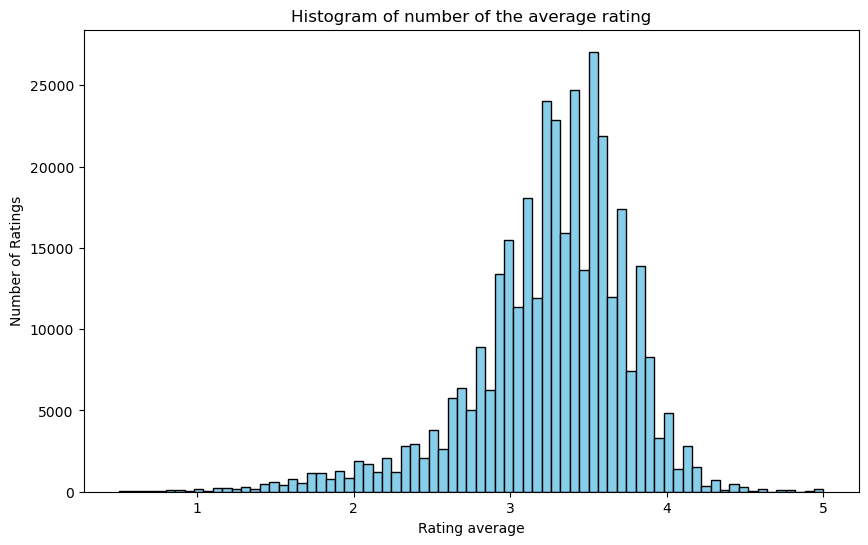

In [10]:
# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(beers_df_rb['rating'], bins=75, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Rating average')
plt.ylabel('Number of Ratings')
plt.title('Histogram of number of the average rating')

# Show the plot
plt.show()

We compare it to the histogram from the beers.csv files that aditionnaly contain ratings of people who did not write reviews. We also display some basic data characteristics

In [11]:
beers_df_all = pd.read_csv(r'C:\Users\jjfrybes\Downloads\RateBeer\beers.csv')

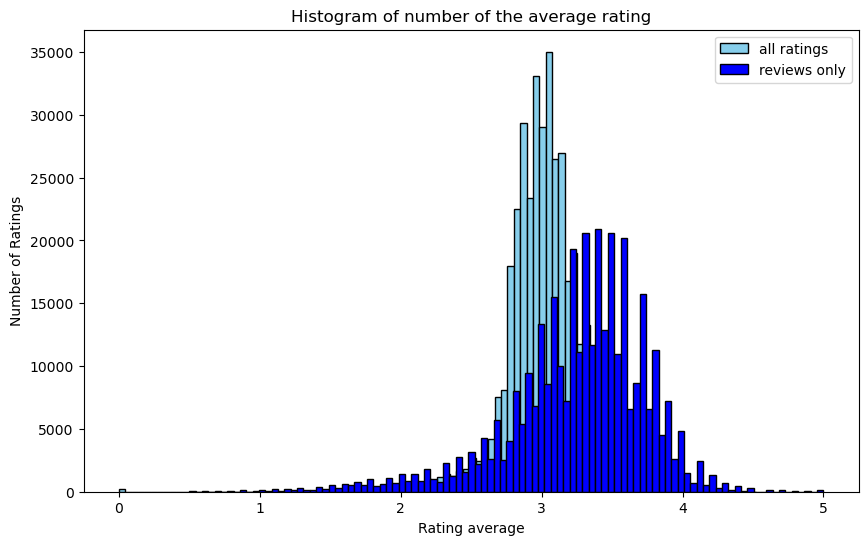

In [19]:
# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(beers_df_all['avg'], bins=100, color='skyblue', edgecolor='black',label='all ratings')
plt.hist(beers_df_rb['rating'], bins=100, color='blue', edgecolor='black',label='reviews only')

# Adding labels and title
plt.xlabel('Rating average')
plt.ylabel('Number of Ratings')
plt.title('Histogram of number of the average rating')
plt.legend()

# Show the plot
plt.show()

In [21]:
beers_df_rb['rating'].describe()

count    359958.000000
mean          3.251269
std           0.502613
min           0.500000
25%           3.000000
50%           3.310000
75%           3.600000
max           5.000000
Name: rating, dtype: float64

In [22]:
beers_df_all['avg'].describe()

count    395657.000000
mean          3.026580
std           0.304503
min           0.000000
25%           2.870000
50%           3.020000
75%           3.180000
max           4.520000
Name: avg, dtype: float64

We can see that the ratings are not the same. It seems that people who leave a full review instead of just a rating seem to give a higher rating than the ones who just leave a rating. Furthermore the standard deviation is much higher, people seem to use the rating spectrum much more widely. 

As we not only want to study the rating but also the various aspects of the beers, only available in the reveiws we also plot graphs for the other criteria (aroma, palate, taste and overall)

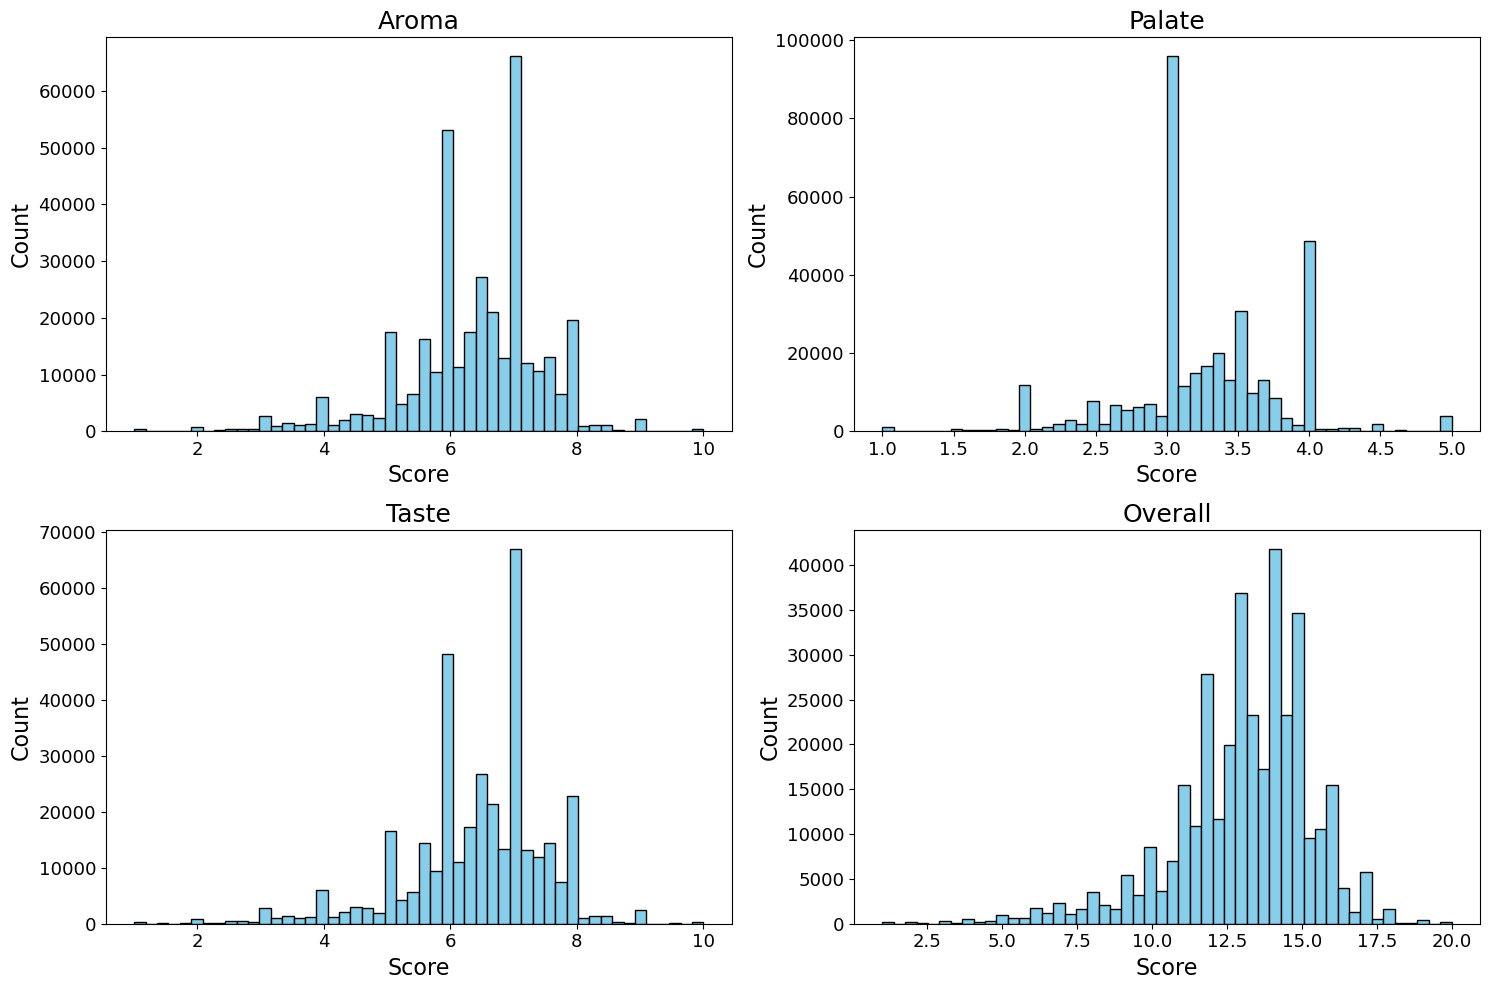

In [32]:
# Define the columns for which you want to create histograms
columns_to_plot = ['aroma', 'palate', 'taste', 'overall']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.hist(beers_df_rb[column], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(column.capitalize(), fontsize= 18)
    ax.set_xlabel('Score', fontsize= 16)
    ax.set_ylabel('Count', fontsize= 16)
    ax.tick_params(axis='x', labelsize=13)  # Set x-axis tick label font size
    ax.tick_params(axis='y', labelsize=13)  # Set x-axis tick label font size

# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()

The distributions have clear peaks at integer values. This is expected as for beers that have few ratings, the average is much more likely to be an integer. For example if there is a single review that the score will necesaarily be an integer as you can only grade it with an integer. We will want to see what the importance of each of those aspects is for the beers

Let's now see if average ratings have evolved over time. We do this on a yearly basis. The date is represented as a (very large) float value, which is a *Unix time* (https://en.wikipedia.org/wiki/Unix_time), the time in seconds since January 1st 1970. We convert it to a date and add a year column to our data

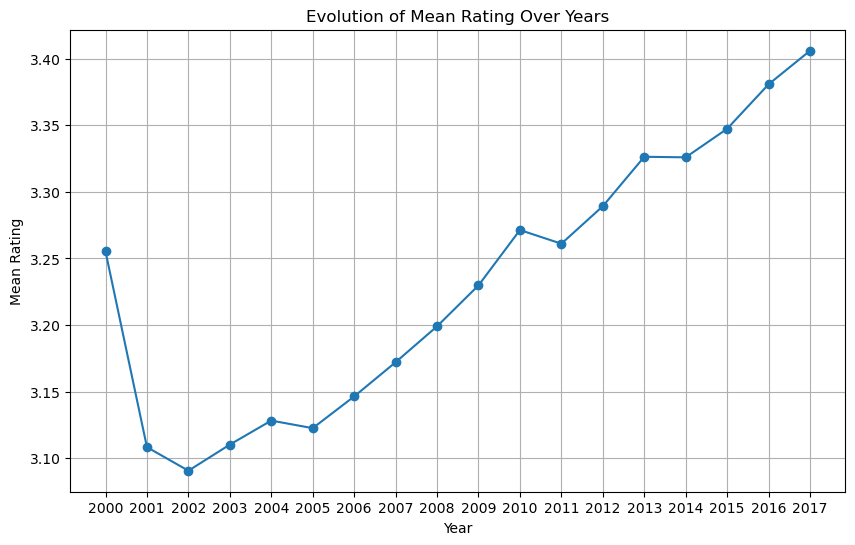

In [35]:
# Convert Unix time to datetime
df_rb['date'] = pd.to_datetime(df_rb['date'], unit='s')

# Extract the year from the datetime
df_rb['year'] = df_rb['date'].dt.year

# Group by year and calculate the mean rating
mean_ratings_by_year = df_rb.groupby('year')['rating'].mean()

# Plot the evolution of the mean rating
plt.figure(figsize=(10, 6))
plt.plot(mean_ratings_by_year.index, mean_ratings_by_year.values, marker='o', linestyle='-')
plt.title('Evolution of Mean Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Rating')
plt.xticks(mean_ratings_by_year.index)
plt.grid(True)
plt.show()

We can see that the mean rating per year increases with time. This needs to be taken into account when we want to study the evolution of the beer preferences. We do not yet know where this trend really comes from. We will need to verify if this trend comes from the fact that the beers got better over time or if there is some other bias, for example like the herding effect discussed in the paper by Gael Lederrey and Robert West on the herding effect.


Let's see what beer styles we have in our dataset and which are the most common (most rated) and choose the top 6 that we will plot


In [66]:
# Group by 'beer_style' and calculate the count of reviews
review_counts_by_style = df_rb['style'].value_counts()

# Identify the 6 most popular styles based on review count
most_common_styles = review_counts_by_style.nlargest(6).index
most_rare_styles = review_counts_by_style.nsmallest(6).index
print(f'The most common styles are \n {review_counts_by_style[most_common_styles]}')
print(f'The rarest styles are \n {review_counts_by_style[most_rare_styles]}')

The most common styles are 
 style
India Pale Ale (IPA)    568385
Imperial Stout          356738
Pale Lager              313598
American Pale Ale       291072
Imperial IPA            277638
Belgian Strong Ale      259250
Name: count, dtype: int64
The rarest styles are 
 style
Saké - Namasaké      5
Saké - Tokubetsu     8
Saké - Koshu        14
Saké - Honjozo      18
Saké - Infused      36
Saké - Ginjo        42
Name: count, dtype: int64


We can see that some beer styles are much more common and have many more ratings. Let's see if for the first 6 most rated beer styles the evolution of the average ratings also increases like the mean of all ratings.

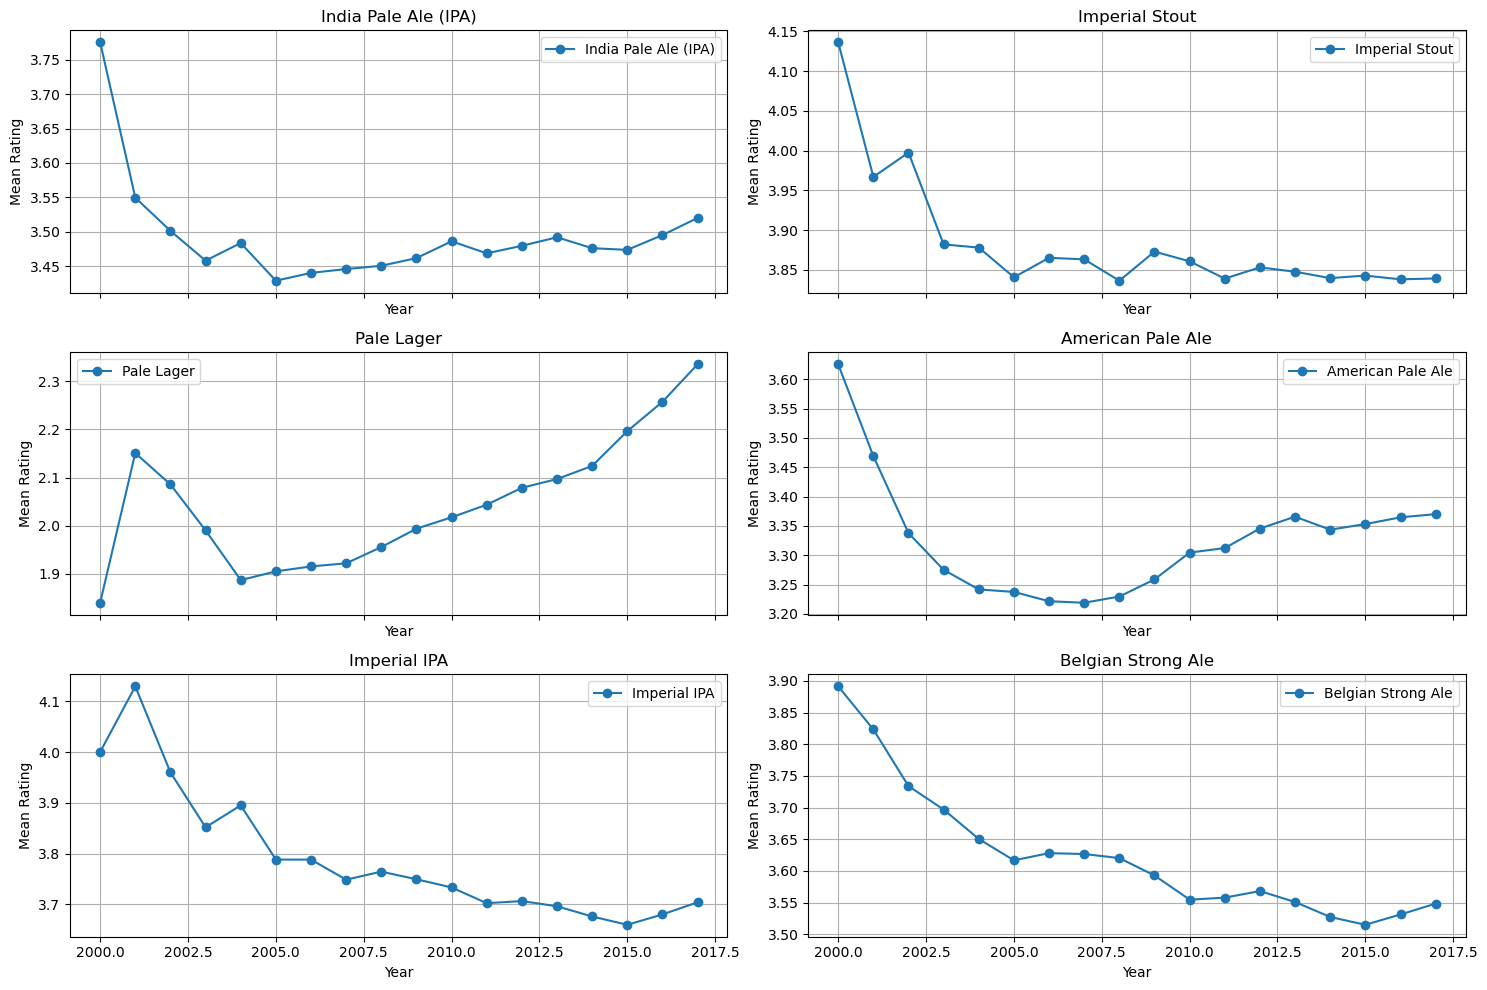

In [73]:
# Group by 'beer_style' and 'year', calculate the mean rating
mean_ratings_by_style_year = df_rb.groupby(['style', 'year'])['rating'].mean()

# Filter the DataFrame to include only the rows corresponding to the top 9 styles
df_most_common_styles = df_rb[df_rb['style'].isin(most_common_styles)]

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharex=True)

# Iterate over each style and plot on a separate subplot
for i, style in enumerate(most_common_styles):
    row, col = divmod(i, 2)
    style_data = df_most_common_styles[df_most_common_styles['style'] == style].groupby('year')['rating'].mean()
    axes[row, col].plot(style_data.index, style_data.values, marker='o', label=style)
    axes[row, col].set_title(style)
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Mean Rating')
    axes[row, col].grid(True)
    axes[row, col].legend()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


As can be seen this is clearly not the case. The 6 most popular beer styles (beer styles with the most ratings) don't have an average rating that follows the same trend as the overall average. This clearly means that there is some evolution of beer preferences with time. We must further investigate this. Let's also plot the same graphs for the most liked beer styles and not the most popular beers

In [71]:
# Group by 'beer_style' and calculate the mean rating across all years
mean_ratings_overall = df_rb.groupby('style')['rating'].mean()

# Identify the 6 beer styles with the highest mean ratings
best_beer_styles = mean_ratings_overall.nlargest(6).index

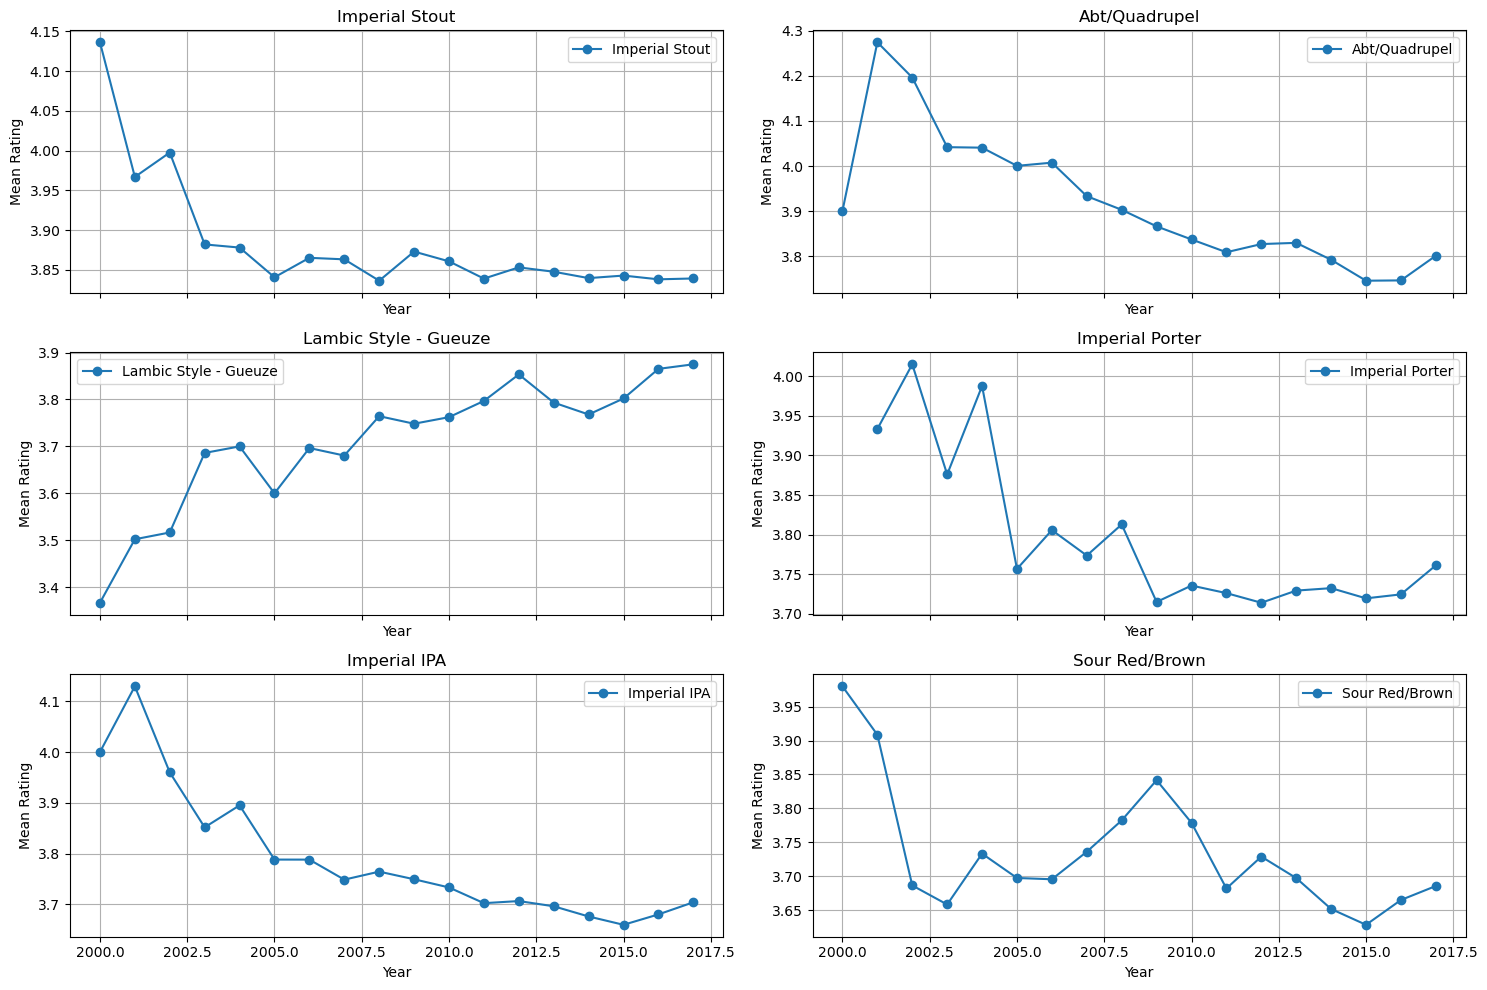

In [75]:
# Filter the DataFrame to include only the rows corresponding to the top 9 styles
df_best_styles = df_rb[df_rb['style'].isin(best_beer_styles)]

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharex=True)

# Iterate over each style and plot on a separate subplot
for i, style in enumerate(best_beer_styles):
    row, col = divmod(i, 2)
    style_data = df_best_styles[df_best_styles['style'] == style].groupby('year')['rating'].mean()
    axes[row, col].plot(style_data.index, style_data.values, marker='o', label=style)
    axes[row, col].set_title(style)
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Mean Rating')
    axes[row, col].grid(True)
    axes[row, col].legend()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

We can see that some beer styles used to be much more liked than they are now. For exampl the Abt/Quadrupel went from an avergae rating of 4.3 in 2001 to an average rating of 3.8 in 2017. 
Furthermore the beer style Lambic Style - Gueuze for example has come from an average rating of 3.4 up to 3.9 and has become more liked than the Abt/Quadrupel. This clearly shows there is an evolution of the beer preferences with time and justifies our study of this. 
We will have to analyze whether this evolution is somehow correlated with the number of beers in each of these styles as well as the number of ratings. It will also be interesting to see whether we can find some common characteristics of beers whose mean ratings have increased over time and of those whose ratings have decreased.

It is also interesting to note that some beer styles, like for example the sour Red/Brown have huge variations between two consecutive years. It will be intereseting to see what can be the cause of that. Was it maybe an introduction of a new beer of this style onto the market that had very good ratings?

If we want to look at the evolution of tastes, we can also look at the number of beer releases per year as a function of their style.

To do so, we would need to estimate the beer release of each beer, by taking the date of the first review. This might not be very usefull for Corona as it has been released in 1925 (https://en.wikipedia.org/wiki/Corona_(beer)). But lets try it for another random beer.

In [123]:
print("The number of missing 'beer_id' values is", df_rb.beer_id.isnull().sum(), "\nThe number of missing 'beer_name' values is",df_rb.beer_name.isnull().sum())
df_ratings_id_nan = (df_rb.loc[(df_rb['beer_id'].isnull())&(df_rb['beer_name'].isnull())])
print("The number of ratings to which we haven't access to the beer is", len(df_ratings_id_nan.beer_id))


The number of missing 'beer_id' values is 0 
The number of missing 'beer_name' values is 0
The number of ratings to which we haven't access to the beer is 0


In [108]:
# Find the earliest date for each 'beer_id'
earliest_dates = df_rb.groupby('beer_id')['date'].min().reset_index()
earliest_dates.columns = ['beer_id', 'earliest_rating']
earliest_dates['release_date'] = pd.to_datetime(earliest_dates['earliest_rating'], unit='s')
display(earliest_dates)

,beer_id,earliest_rating,release_date
0,1,2000-05-14 10:00:00,2000-05-14 10:00:00
1,2,2000-09-06 10:00:00,2000-09-06 10:00:00
2,3,2000-11-02 11:00:00,2000-11-02 11:00:00
3,4,2000-11-22 11:00:00,2000-11-22 11:00:00
4,5,2000-11-22 11:00:00,2000-11-22 11:00:00
...,...,...,...
396685,536472,2017-07-25 10:00:00,2017-07-25 10:00:00
396686,536473,2017-07-25 10:00:00,2017-07-25 10:00:00
396687,536474,2017-07-03 10:00:00,2017-07-03 10:00:00
396688,536475,2017-07-27 10:00:00,2017-07-27 10:00:00


In [109]:
# Merging it back into df_beers
df_beers_date = df_beers_enlarged.merge(earliest_dates, how='outer', on=['beer_id'])
display(df_beers_date)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,name,nbr_beers,earliest_rating,release_date
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN,Gabon,Sobraga,3,2016-04-26 10:00:00,2016-04-26 10:00:00
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN,Gabon,Sobraga,3,2009-06-18 10:00:00,2009-06-18 10:00:00
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN,Gabon,Sobraga,3,2004-06-25 10:00:00,2004-06-25 10:00:00
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667,Northern Ireland,Ards Brewing Co.,13,2011-11-17 11:00:00,2011-11-17 11:00:00
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN,Northern Ireland,Ards Brewing Co.,13,2013-11-23 11:00:00,2013-11-23 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442076,189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN,Albania,Stefani & Co,11,2012-11-19 11:00:00,2012-11-19 11:00:00
442077,84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN,Albania,Hotel Martini,1,2008-03-03 11:00:00,2008-03-03 11:00:00
442078,93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN,Albania,Rozafa Brewery,1,2008-09-28 10:00:00,2008-09-28 10:00:00
442079,220897,Svejk Blonde,17155,Svejk Beer Garden,Pale Lager,4,NaN,NaN,2.70,NaN,2.500000,NaN,0,NaN,Albania,Svejk Beer Garden,2,2013-12-01 11:00:00,2013-12-01 11:00:00


In [110]:
print('The share of missing release date values is', np.round((df_beers_date.release_date.isnull().sum())/len(df_beers_date.release_date)*100,2),'%')

The share of missing release date values is 10.27 %


Now that we have a the beer release date estimation for most of our beers, lets plot the histogram of it and compare it we the histogram of joined users.

Because one could say that the estimated release date is heavely correlated to the number of users active on the website. Such that we could see new beer releases when, new users join the website, which could discredit the release date veracity.



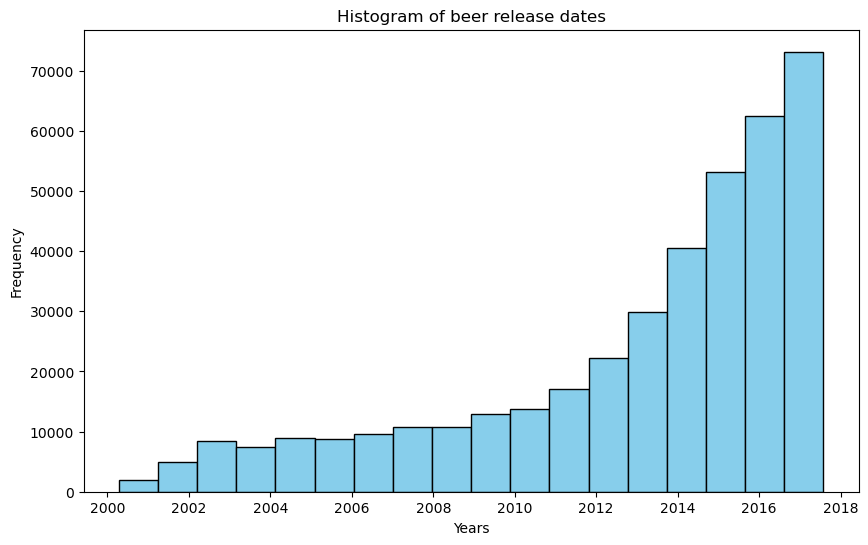

In [111]:
# Histogram of the estimated new beers release dates

plt.figure(figsize=(10, 6))
plt.hist(df_beers_date.release_date, bins=18, color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Histogram of beer release dates')
plt.xlabel('Years')
plt.ylabel('Frequency')

# Show the plot
plt.show()


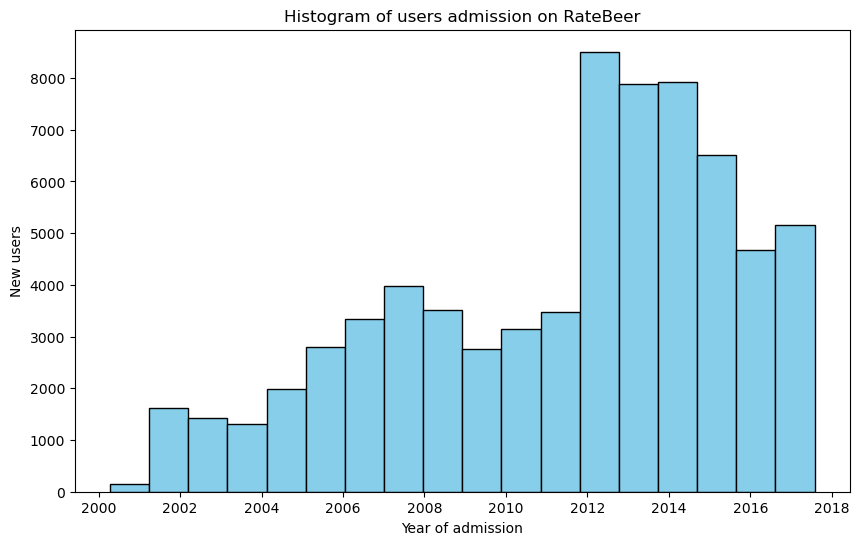

In [112]:
# Histogram of joining dates of the users

plt.figure(figsize=(10, 6))
plt.hist(df_users_date.joined_date, bins=18, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Year of admission')
plt.title('Histogram of users admission on RateBeer')
plt.ylabel('New users')

# Show the plot
plt.show()

We can see that the two histograms have very different shapes. The number of beer release follows a monotonic increase, while the number of new users increased until 2012 where it had a massive peak, and decreases since.

So one can assume that the estimated of beer release date is not linked to the joining of new users on the website.




## BeerAdvocate Dataset

From now let's try to dig in the second dataset from BeerAdvocate

In [113]:
df_beers_ba = pd.read_csv(r'C:\Users\jjfrybes\Downloads\BeerAdvocate\beers.csv')
df_breweries_ba = pd.read_csv(r'C:\Users\jjfrybes\Downloads\BeerAdvocate\breweries.csv')
df_users_ba = pd.read_csv(r'C:\Users\jjfrybes\Downloads\BeerAdvocate\users.csv')

### beers.csv

In [114]:
# Printing some basic information about df_beers
beers_columns_ba = df_beers_ba.columns.values
print('The columns included in df_beers_ba are ',beers_columns_ba)
print('The shape of df_beers_ba is', df_beers_ba.shape)
print('So that',df_beers_ba.beer_id.nunique(), 'unique beers are registered. Meaning that the number of missing beer_id values is',df_beers.beer_id.isnull().sum())
print('These beers come from',df_beers_ba.brewery_id.nunique(), 'different breweries.')

print('\nThe missing percentage of data per column of the following :')
display((df_beers_ba.isnull().mean() * 100).round(2))

The columns included in df_beers_ba are  ['beer_id' 'beer_name' 'brewery_id' 'brewery_name' 'style' 'nbr_ratings'
 'nbr_reviews' 'avg' 'ba_score' 'bros_score' 'abv' 'avg_computed' 'zscore'
 'nbr_matched_valid_ratings' 'avg_matched_valid_ratings']
The shape of df_beers_ba is (280823, 15)
So that 280823 unique beers are registered. Meaning that the number of missing beer_id values is 0
These beers come from 14325 different breweries.

The missing percentage of data per column of the following :


beer_id                       0.00
beer_name                     0.00
brewery_id                    0.00
brewery_name                  0.00
style                         0.00
nbr_ratings                   0.00
nbr_reviews                   0.00
avg                          11.69
ba_score                     78.21
bros_score                   97.97
abv                          12.83
avg_computed                 11.69
zscore                       85.65
nbr_matched_valid_ratings     0.00
avg_matched_valid_ratings    89.93
dtype: float64

We can see that compared to the RateBeer that the columns concerning the ratings/review are a bit a different, but the following columns are available in both datasets : _beer_id_, _beer_name_, _brewery_id_, _brewery_name_, _style_, _nbr_ratings_, _avg_, _abv_, _avg_computed_, _zscore_, _nbr_matched_valid_ratings_, _avg_matched_valid_ratings_




### breweries.csv

The columns included in df_breweries_ba are  ['id' 'location' 'name' 'nbr_beers']


count    16758.000000
mean        21.056331
std         69.417841
min          0.000000
25%          2.000000
50%          6.000000
75%         18.000000
max       1196.000000
Name: nbr_beers, dtype: float64

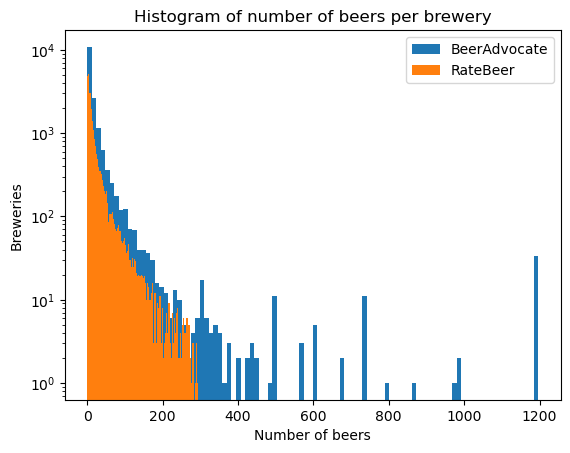

There are 297 location represented.


In [115]:
# Printing some basic information about df_breweries
breweries_columns_ba = df_breweries_ba.columns.values
print('The columns included in df_breweries_ba are ',breweries_columns_ba)
display(df_breweries_ba.nbr_beers.describe())

plt.hist(df_breweries_ba['nbr_beers'], bins=100, label='BeerAdvocate', log=True)
plt.hist(df_breweries['nbr_beers'], bins=100, label='RateBeer', log=True)
plt.title('Histogram of number of beers per brewery')
plt.xlabel('Number of beers')
plt.ylabel('Breweries')
plt.legend(prop={'size': 10})

plt.show()
print('There are',df_breweries_ba.location.nunique(), 'location represented.')

Compared to the other dataset we have here more locations but few breweries. In terms of columns they remain the same. Also the BeerAdvocate seems to have breweries that have a huge amount of different beers (more than 350 different beers).

In [116]:
df_breweries_ba[df_breweries_ba.nbr_beers >= 250].sort_values(by='nbr_beers', ascending=False)

,id,location,name,nbr_beers
11625,1764,"United States, Iowa",Rock Bottom Restaurant & Brewery,1196
14028,1152,"United States, Illinois",Rock Bottom Restaurant & Brewery,1196
10903,2203,"United States, Indiana",Rock Bottom Restaurant And Brewery,1196
15928,2386,"United States, Arizona",Rock Bottom Restaurant & Brewery - Ahwatukee,1196
15777,2461,"United States, California",Rock Bottom Restaurant and Brewery,1196
...,...,...,...,...
13252,1471,"United States, Michigan",Dark Horse Brewing Company,258
12385,4063,"United States, Kansas",River City Brewing Co.,258
14124,22072,"United States, Illinois",Revolution Brewing,255
11899,31722,"United States, North Carolina",Burial Beer Co.,251


Weirdly breweries with the same name 'Rock Bottom Restaurant & Brewery' in various locations trust the first places of the number of beers per breweries, they all have the same number of beers (1196).

It seems that these breweries are in the same chain, that consist of local breweries that produce a **lot** of different craft beers (https://rockbottom.com/our-story/).

However 1196 beers might be too much for small breweries, and the fact that all branches have this number is strange, so lets dig in the beers from these breweries.

In [117]:
# Lets look at the Iowa branch of Rock Bottom breweries
display(df_beers_ba.loc[df_beers_ba['brewery_id']==1764])
display(df_beers_ba.loc[df_beers_ba['brewery_id']==2461])

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings


,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings


The breweries are not callable from their brewery_id in the beers dataframe. So lets try with the brewery_name

In [118]:
df_beers_ba_rock=df_beers_ba.loc[df_beers_ba['brewery_name']=='Rock Bottom Restaurant & Brewery']
display(df_beers_ba_rock)
print("The number of brewery_id represented by the brewery name 'Rock Bottom Restaurant & Brewery' is",df_beers_ba_rock.brewery_id.nunique())

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
69768,8732,"""Naughty Scot"" Scotch Ale",1550,Rock Bottom Restaurant & Brewery,Scotch Ale / Wee Heavy,8,6,3.73,NaN,NaN,7.3,3.77,NaN,0,NaN
69769,40669,"""Trouble""",1550,Rock Bottom Restaurant & Brewery,Belgian Dark Ale,1,1,4.07,NaN,NaN,6.2,4.07,NaN,0,NaN
69770,192444,#basic Pumpkin Wheat,1550,Rock Bottom Restaurant & Brewery,Fruit / Vegetable Beer,1,0,3.52,NaN,NaN,6.8,3.52,NaN,0,NaN
69771,13328,(IPA)2,1550,Rock Bottom Restaurant & Brewery,American IPA,1,1,3.94,NaN,NaN,NaN,3.94,NaN,0,NaN
69772,22220,(Woodford Reserve) Bourbon Barrel Porter,1550,Rock Bottom Restaurant & Brewery,American Porter,1,1,4.18,NaN,NaN,10.5,4.18,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275183,17475,Red Sock Bock,227,Rock Bottom Restaurant & Brewery,Maibock / Helles Bock,1,1,4.00,NaN,NaN,6.8,4.00,NaN,0,NaN
275184,32362,Rockbrau Pils,227,Rock Bottom Restaurant & Brewery,Czech Pilsener,1,1,4.05,NaN,NaN,5.0,4.05,NaN,0,NaN
275185,32750,Rocktoberfest,227,Rock Bottom Restaurant & Brewery,Märzen / Oktoberfest,1,1,3.55,NaN,NaN,NaN,3.55,NaN,0,NaN
275186,20119,Sheehan Stout,227,Rock Bottom Restaurant & Brewery,Oatmeal Stout,1,1,4.22,NaN,NaN,5.2,4.22,NaN,0,NaN


The number of brewery_id represented by the brewery name 'Rock Bottom Restaurant & Brewery' is 2


Only two of the breweries are recognized with the brewery name.

We are going to try another method, creating a series with the brewery_id and merge it with the df_beer_ba

In [119]:
rock_series = df_breweries_ba.loc[df_breweries_ba['name']=='Rock Bottom Restaurant & Brewery']['id']
df_rock=pd.DataFrame(rock_series)
df_rock=df_rock.rename(columns={'id':'brewery_id'})
df_rock_merged=pd.merge(df_rock, df_beers_ba, on=['brewery_id'], how='inner')

In [120]:
df_rock_merged

,brewery_id,beer_id,beer_name,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,227,19935,American Dream IPA,Rock Bottom Restaurant & Brewery,American IPA,3,3,4.23,NaN,NaN,5.40,4.230,NaN,0,NaN
1,227,20974,Anniversary Ale,Rock Bottom Restaurant & Brewery,American Pale Ale (APA),4,4,3.67,NaN,NaN,5.30,3.695,NaN,0,NaN
2,227,20920,Black Dolphin,Rock Bottom Restaurant & Brewery,Schwarzbier,1,1,3.45,NaN,NaN,4.90,3.450,NaN,0,NaN
3,227,17665,Burnie's Best Bitter,Rock Bottom Restaurant & Brewery,English Bitter,1,1,3.48,NaN,NaN,4.80,3.480,NaN,0,NaN
4,227,16263,Czar's Nightmare Imperial Stout,Rock Bottom Restaurant & Brewery,Russian Imperial Stout,2,2,4.19,NaN,NaN,7.50,4.195,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,1550,171655,Wraith Driver IPA,Rock Bottom Restaurant & Brewery,American IPA,2,0,3.63,NaN,NaN,6.90,3.625,NaN,0,NaN
1215,1550,203447,XM@$ Stone Sour Saison,Rock Bottom Restaurant & Brewery,American Pale Wheat Ale,2,1,3.84,NaN,NaN,7.00,3.700,NaN,0,NaN
1216,1550,60116,Yazmin IPA,Rock Bottom Restaurant & Brewery,American IPA,1,1,4.45,NaN,NaN,7.51,4.450,NaN,0,NaN
1217,1550,137469,Ynot,Rock Bottom Restaurant & Brewery,Rye Beer,1,0,3.76,NaN,NaN,6.20,3.760,NaN,0,NaN


### users.csv

In [121]:
# df_users quick description
#display(df_users_ba)

print('Percentage of missing data on the two dataset :')
display(pd.DataFrame({
    'RateBeer' : (df_users.isnull().mean() * 100).astype(int),
    'BeerAdvocate' : (df_users_ba.isnull().mean() * 100).astype(int)
}))


print('\nUsers df description :')
# How are the users ratings distributed
display(df_users_ba.nbr_ratings.describe())

Percentage of missing data on the two dataset :


,RateBeer,BeerAdvocate
joined,0.0,1
location,27.0,20
nbr_ratings,0.0,0
nbr_reviews,NaN,0
user_id,0.0,0
user_name,0.0,0



Users df description :


count    153704.000000
mean         54.605163
std         252.388790
min           1.000000
25%           1.000000
50%           3.000000
75%          16.000000
max       12046.000000
Name: nbr_ratings, dtype: float64

We can also see that the BeerAdvocate dataset contains one more column called _nbr_reviews_ (which also explains the NaN on the RateBeer column).

In terms of the data repartition we have something similar than the dataset from RateBeer.


Let's now also check how the users joined the site :

The percentage of missing not convertible time (NaT) is 1.73%


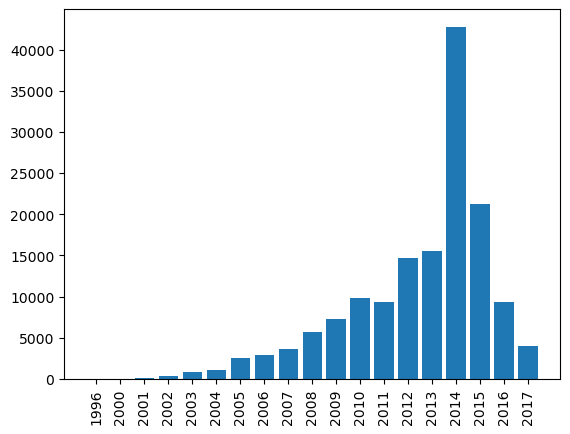

In [122]:
df_users_date_ba =df_users_ba.copy()
df_users_date_ba['joined_date'] = pd.to_datetime(df_users_date_ba['joined'], unit='s')

df_users_date_ba['year_month_of_admission'] = df_users_date_ba['joined_date'].dropna().map(lambda dt: dt.strftime('%Y'))

print(f'The percentage of missing not convertible time (NaT) is {round(df_users_date_ba.isnull().mean().year_month_of_admission * 100,2)}%')

#plt.hist(df_users_date_ba['year_month_of_admission'].dropna().astype(int), bins=df_users_date_ba['year_month_of_admission'].unique().shape[0])
#plt.show()

#df_users_date_cv = df_date_histogram['year_month_of_admission'].value_counts().sort_index()
df_users_date_cv_ba = df_users_date_ba['year_month_of_admission'].value_counts().sort_index()


plt.bar(df_users_date_cv_ba.index, df_users_date_cv_ba, label='BeerAdvocate')
#plt.bar(df_users_date_cv.index, df_users_date_cv, label='RateBeer')


plt.xticks(rotation=90)

plt.show()

